<a href="https://colab.research.google.com/github/JhopperJH/Machine-Leaarning/blob/main/HousePricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Data

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sn
import matplotlib.pyplot as plt
#To show the plot in notebook.
%matplotlib inline

from sklearn import preprocessing, model_selection, metrics
from sklearn import ensemble

from imblearn import over_sampling
import shap

RAND_STATE = 42

In [ ]:
from google.colab import files #Colab lib to upload files to notebook

# Install kaggle package so that we can use the kaggle api ex. for downlading data
!pip install kaggle

# Upload kaggle API key file
uploaded = files.upload()

!mkdir '/root/.kaggle'
!cp 'kaggle.json' '/root/.kaggle/.'
!chmod 600 '/root/.kaggle/kaggle.json'

Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip "/content/house-prices-advanced-regression-techniques.zip" -d "/content/house-prices-advanced-regression-techniques"

Archive:  /content/house-prices-advanced-regression-techniques.zip
replace /content/house-prices-advanced-regression-techniques/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Preprocessing

In [ ]:
df_train = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/content/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
from sklearn.impute import SimpleImputer

original_dtypes = df_test.dtypes

columns_to_impute = ['Functional', 'KitchenQual', 'BsmtHalfBath', 'BsmtFullBath', 'GarageCars', 'MSZoning', 'Utilities', 'SaleType', 'Exterior1st',	'Exterior2nd'	]

imputer = SimpleImputer(strategy='most_frequent')
x_train_imputed = imputer.fit_transform(df_train[columns_to_impute])
df_test[columns_to_impute] = imputer.transform(df_test[columns_to_impute])

In [ ]:
columns_to_impute = ['BsmtFinSF1', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'GarageArea']
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(df_train[columns_to_impute])
df_test[columns_to_impute] = imputer.transform(df_test[columns_to_impute])
df_test = df_test.astype(original_dtypes)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [ ]:
df_train = df_train.dropna(subset=['Electrical'])
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data = all_data.drop(['SalePrice'], axis=1)

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2918 non-null   int64  
 1   MSSubClass     2918 non-null   int64  
 2   MSZoning       2918 non-null   object 
 3   LotFrontage    2432 non-null   float64
 4   LotArea        2918 non-null   int64  
 5   Street         2918 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2918 non-null   object 
 8   LandContour    2918 non-null   object 
 9   Utilities      2918 non-null   object 
 10  LotConfig      2918 non-null   object 
 11  LandSlope      2918 non-null   object 
 12  Neighborhood   2918 non-null   object 
 13  Condition1     2918 non-null   object 
 14  Condition2     2918 non-null   object 
 15  BldgType       2918 non-null   object 
 16  HouseStyle     2918 non-null   object 
 17  OverallQual    2918 non-null   int64  
 18  OverallC

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


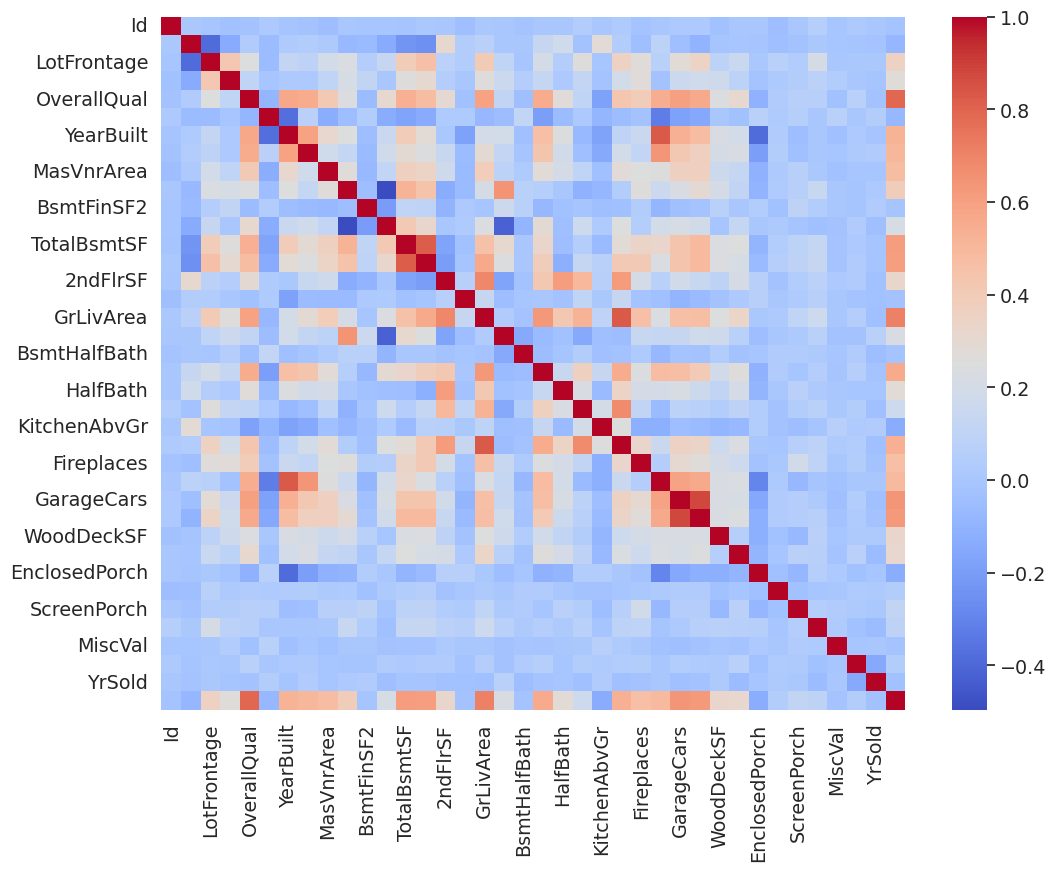

In [ ]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sn.heatmap(corrmat,  cmap='coolwarm', fmt=".2f");

In [ ]:
'''
ลบ  attr ที่ missing เกิน 100
GarageX ไม่สำคํญเท่า GarageCar ที่ไม่มี missing value เลยลบ
ฺBasementX ก็คล้ายๆ GarageX
MasVnrArea กัย MasVnr correlation กับ 'YearBuilt' and 'OverallQual' redundance เลยลบ
Electrical missing แค่ 1 เลยลบ sample นั้นออก
'''
all_data = all_data.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
all_data.isnull().sum().max() #just checking that there's no missing data missing...

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


0

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2918 non-null   int64  
 1   MSSubClass     2918 non-null   int64  
 2   MSZoning       2918 non-null   object 
 3   LotArea        2918 non-null   int64  
 4   Street         2918 non-null   object 
 5   LotShape       2918 non-null   object 
 6   LandContour    2918 non-null   object 
 7   Utilities      2918 non-null   object 
 8   LotConfig      2918 non-null   object 
 9   LandSlope      2918 non-null   object 
 10  Neighborhood   2918 non-null   object 
 11  Condition1     2918 non-null   object 
 12  Condition2     2918 non-null   object 
 13  BldgType       2918 non-null   object 
 14  HouseStyle     2918 non-null   object 
 15  OverallQual    2918 non-null   int64  
 16  OverallCond    2918 non-null   int64  
 17  YearBuilt      2918 non-null   int64  
 18  YearRemo

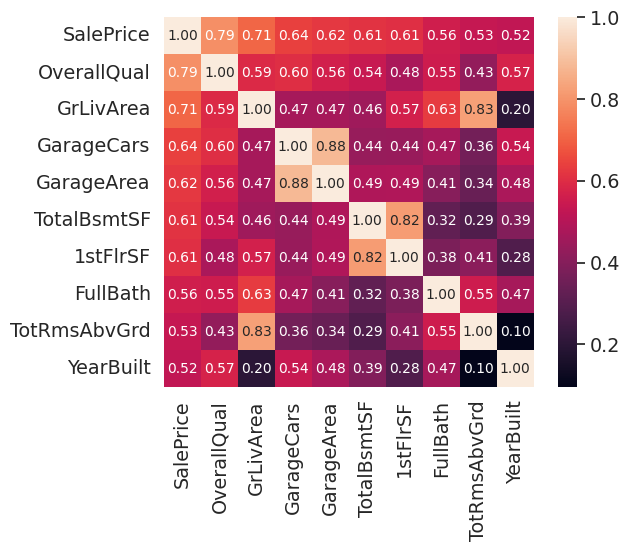

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sn.set(font_scale=1.25)
hm = sn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
df_train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,10517.363948,6.100069,5.575737,1971.244003,1984.850583,443.943797,46.581220,567.366004,...,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,421.411181,42.310746,9984.666267,1.383171,1.113079,30.199555,20.644343,456.106417,161.369977,441.992392,...,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,384.000000,0.000000,479.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,712.500000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#standardizing data
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [ ]:
object_df = all_data.select_dtypes(include=['object'])

In [ ]:
object_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       2918 non-null   object
 1   Street         2918 non-null   object
 2   LotShape       2918 non-null   object
 3   LandContour    2918 non-null   object
 4   Utilities      2918 non-null   object
 5   LotConfig      2918 non-null   object
 6   LandSlope      2918 non-null   object
 7   Neighborhood   2918 non-null   object
 8   Condition1     2918 non-null   object
 9   Condition2     2918 non-null   object
 10  BldgType       2918 non-null   object
 11  HouseStyle     2918 non-null   object
 12  RoofStyle      2918 non-null   object
 13  RoofMatl       2918 non-null   object
 14  Exterior1st    2918 non-null   object
 15  Exterior2nd    2918 non-null   object
 16  ExterQual      2918 non-null   object
 17  ExterCond      2918 non-null   object
 18  Foundation     2918 non-null

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


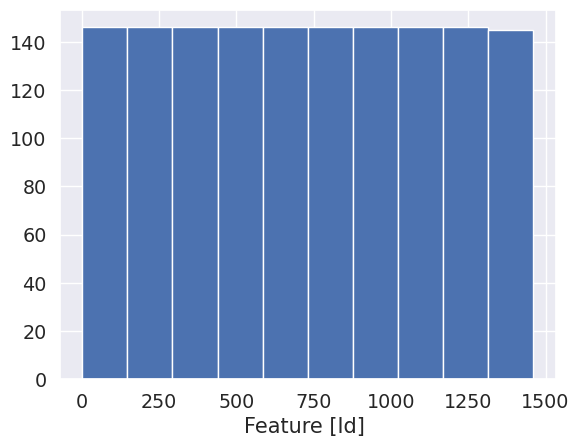

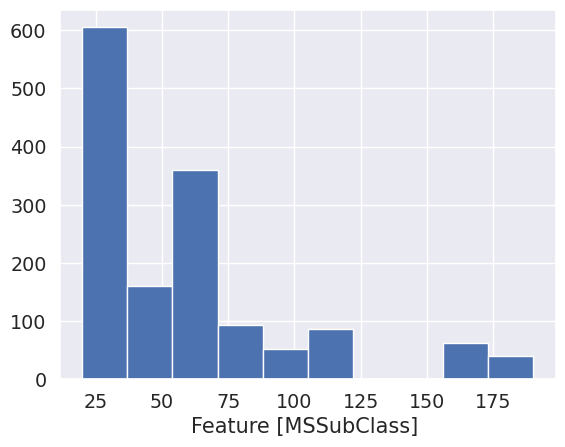

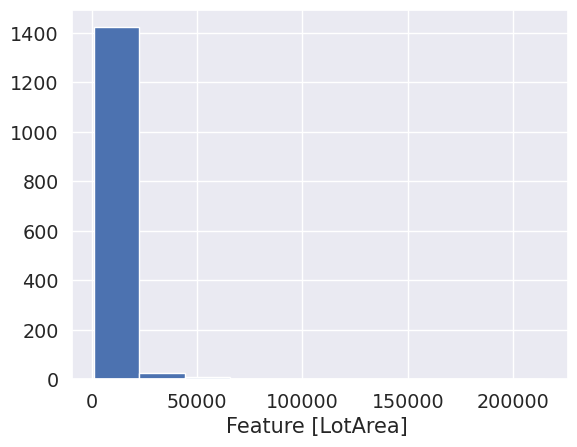

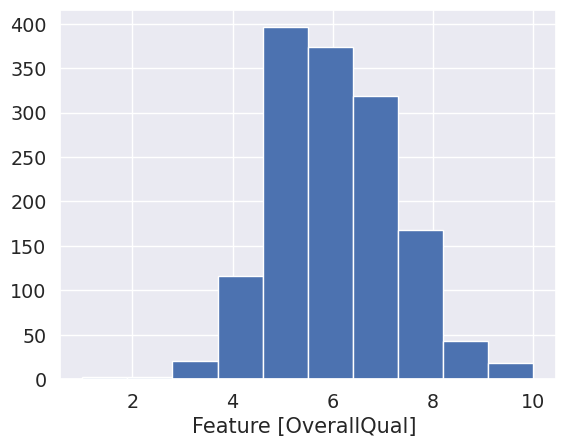

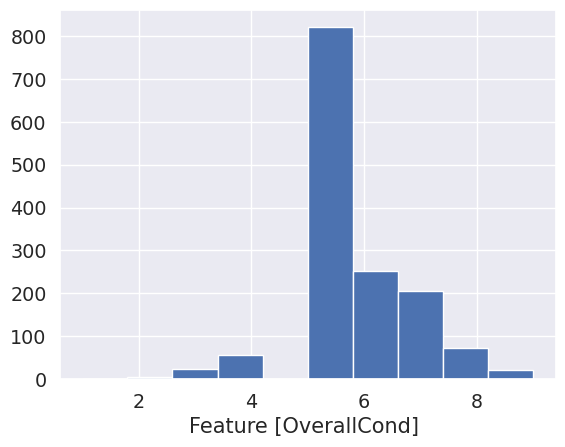

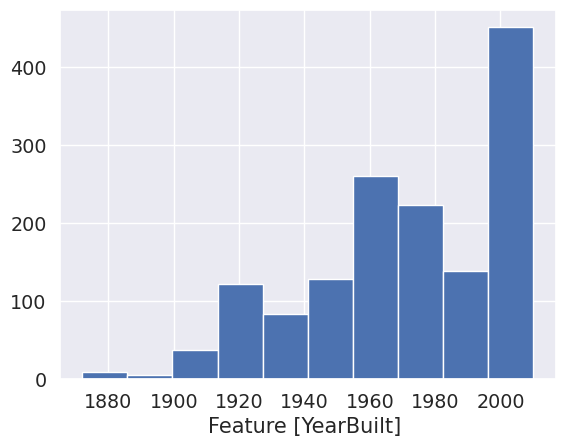

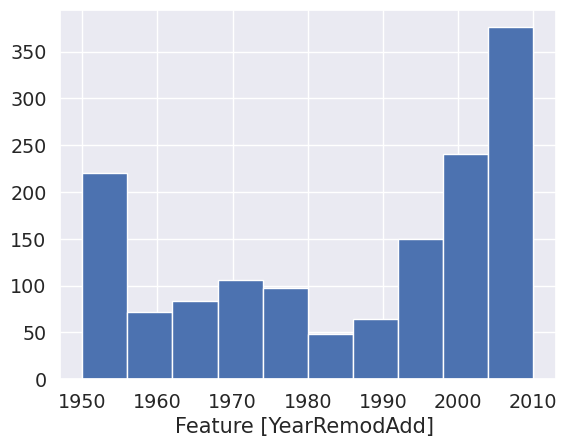

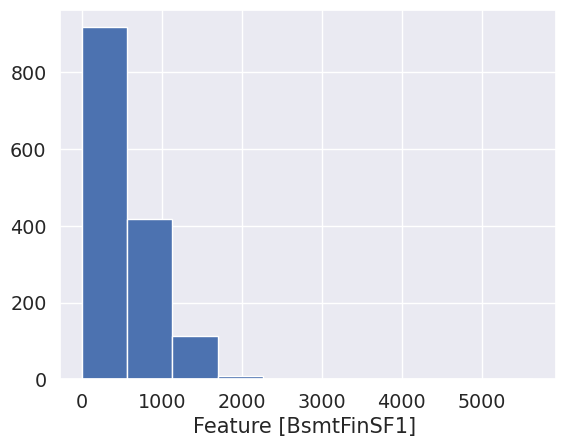

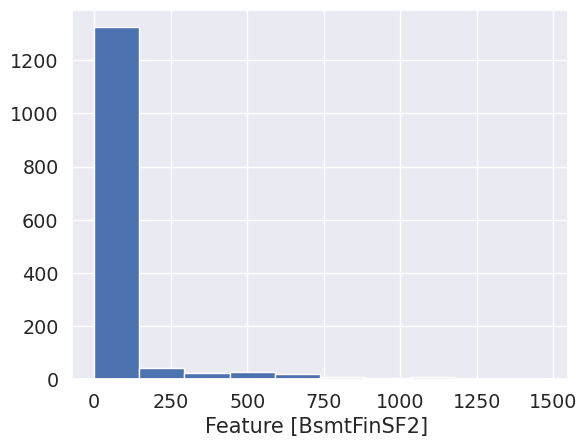

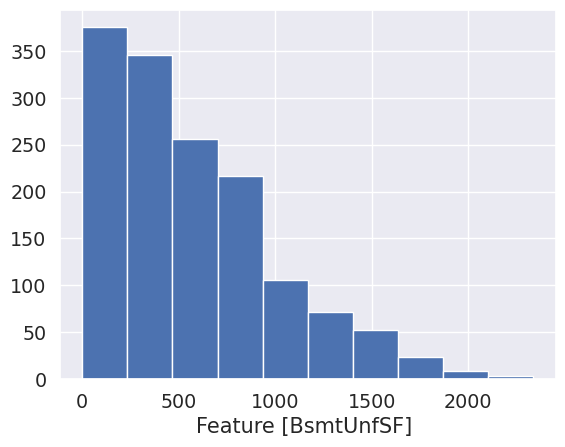

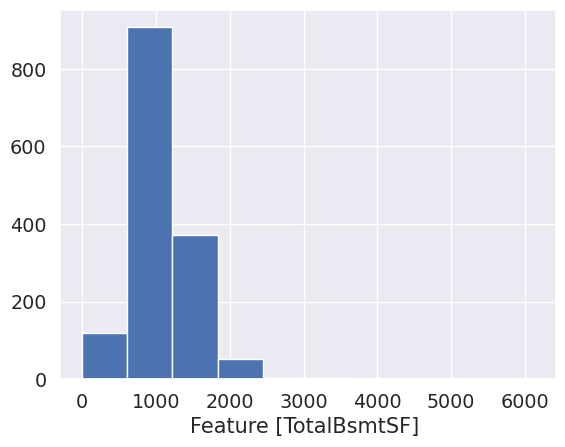

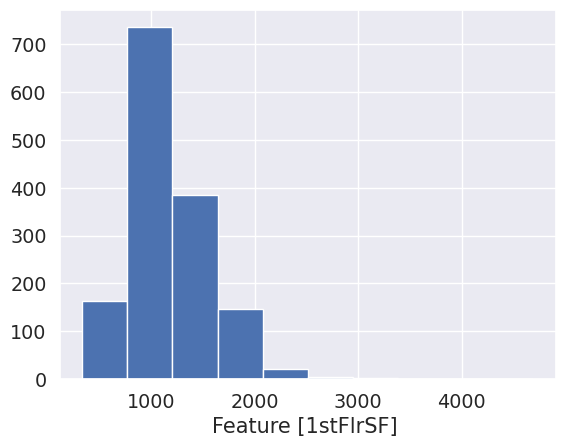

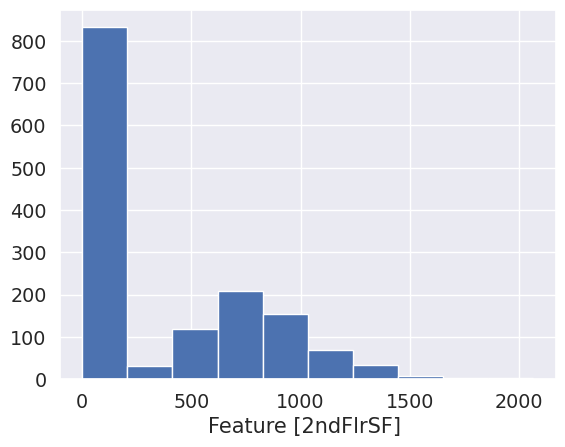

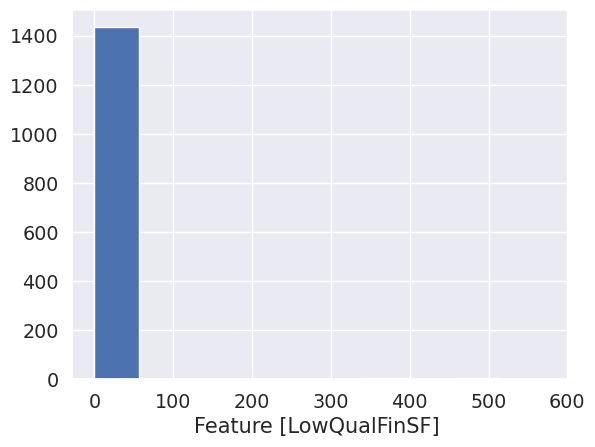

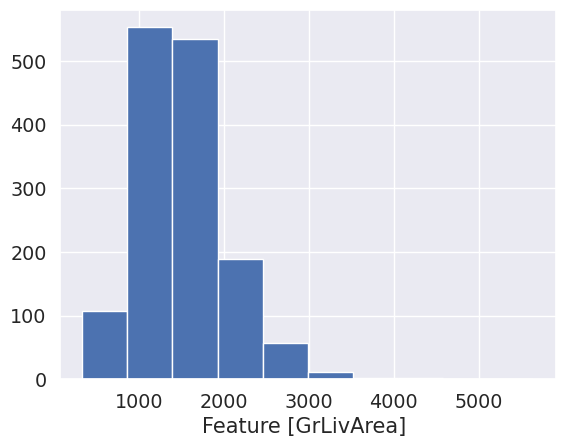

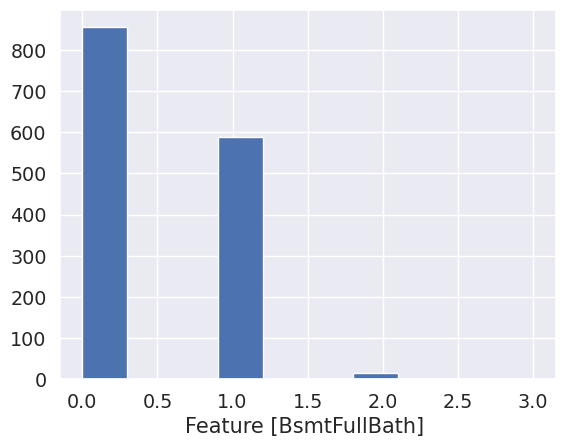

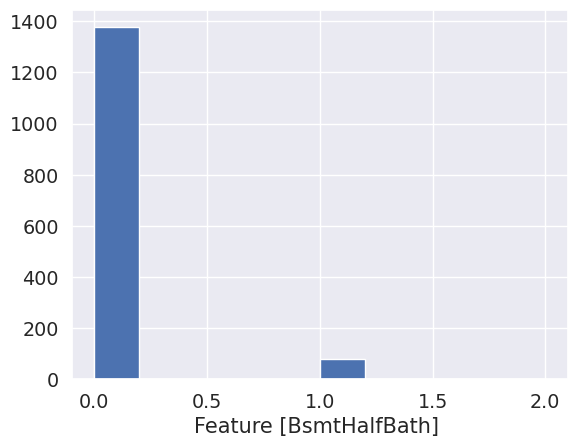

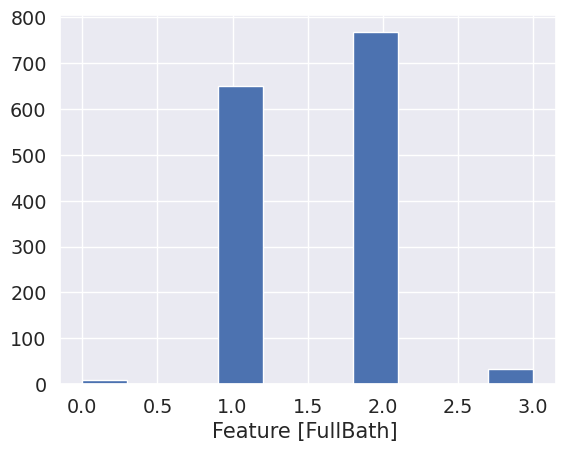

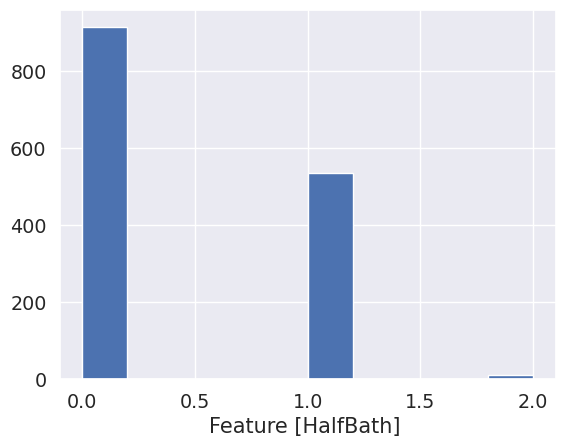

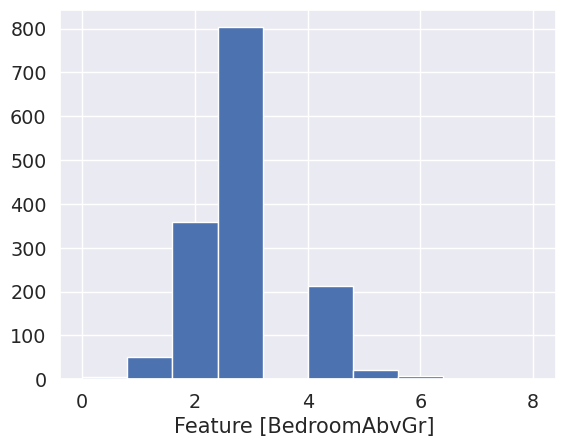

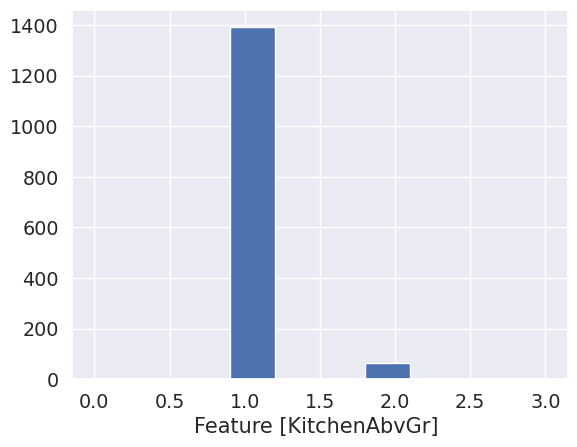

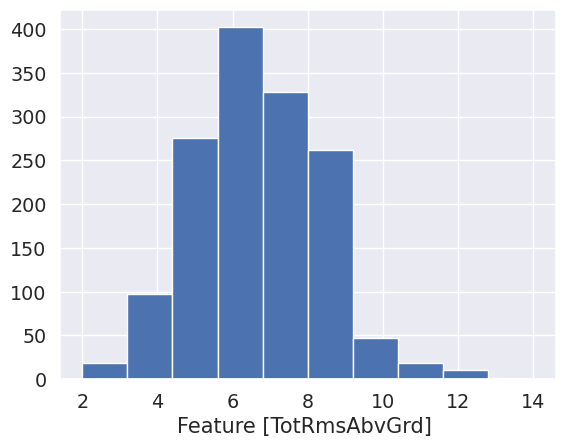

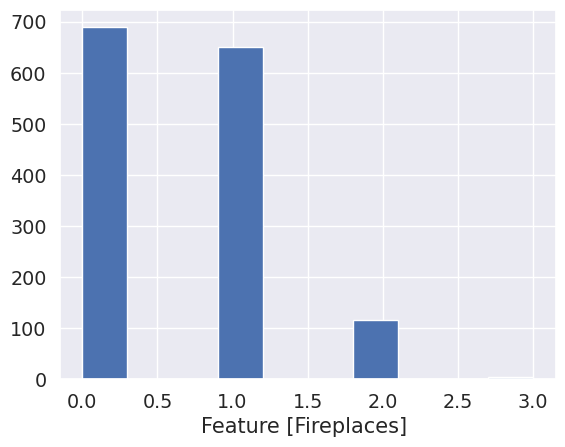

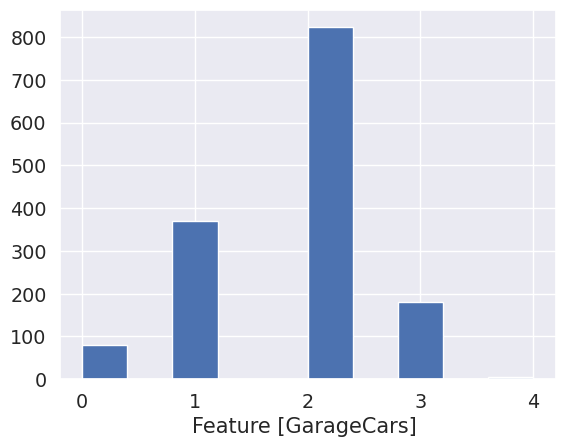

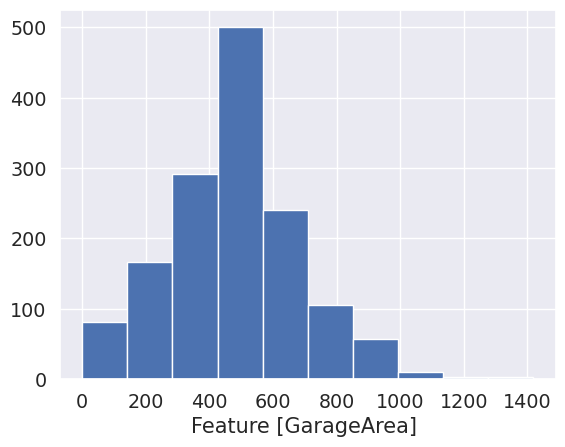

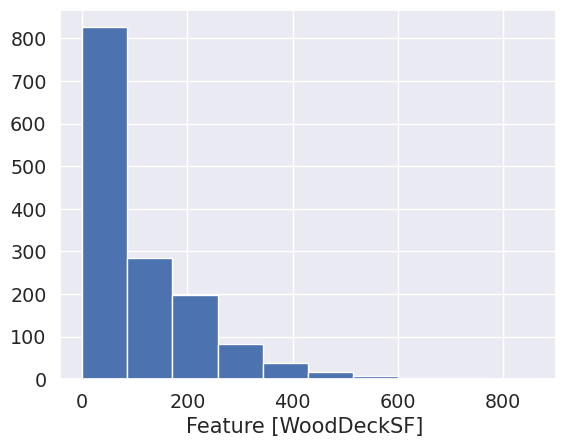

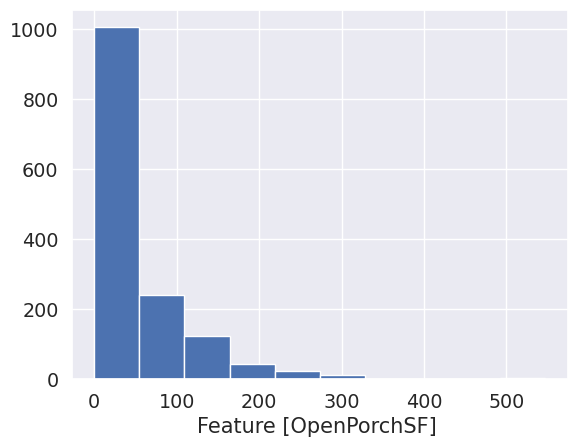

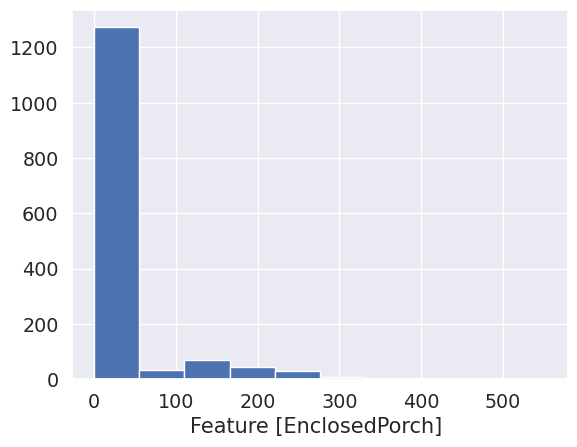

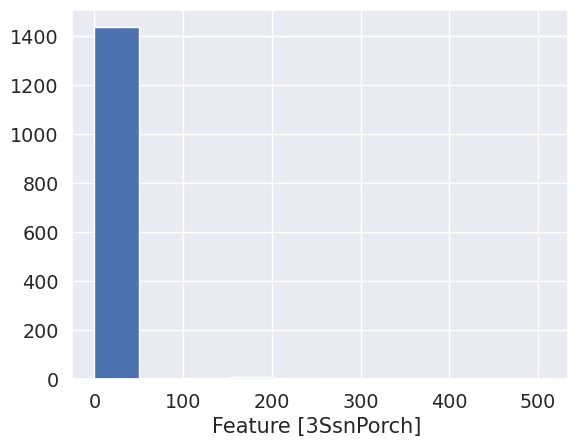

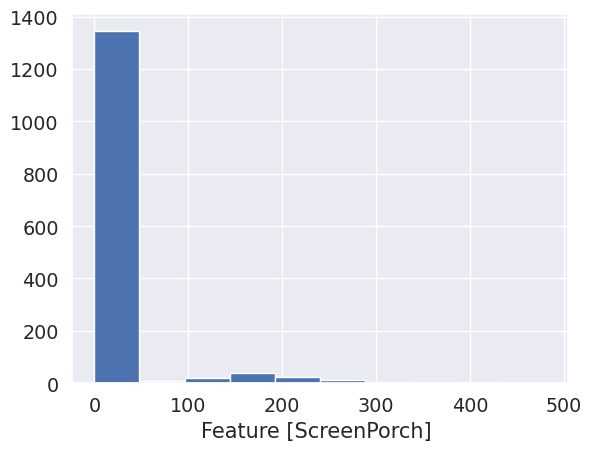

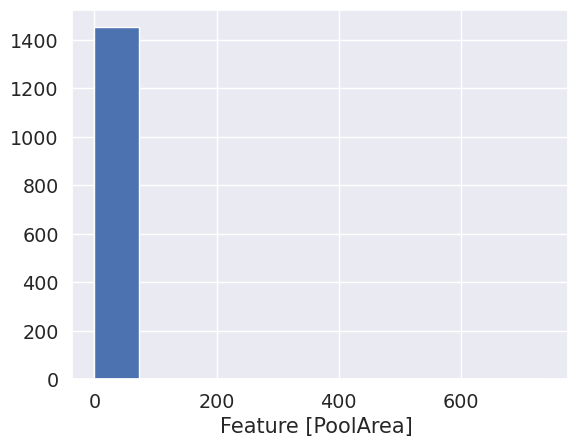

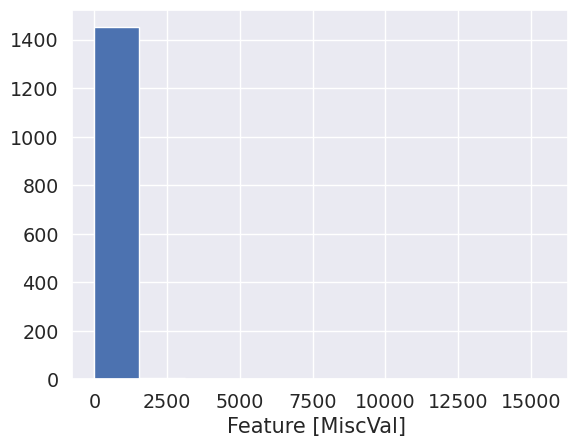

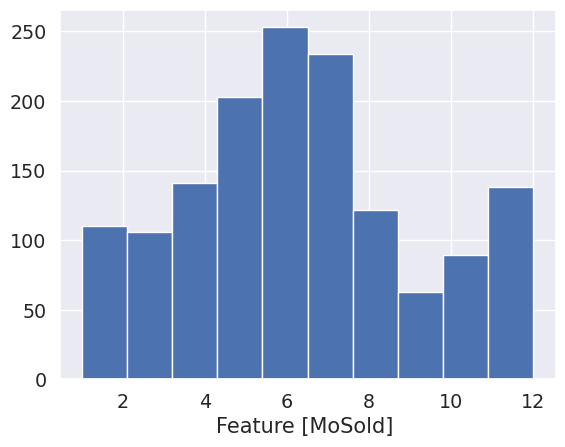

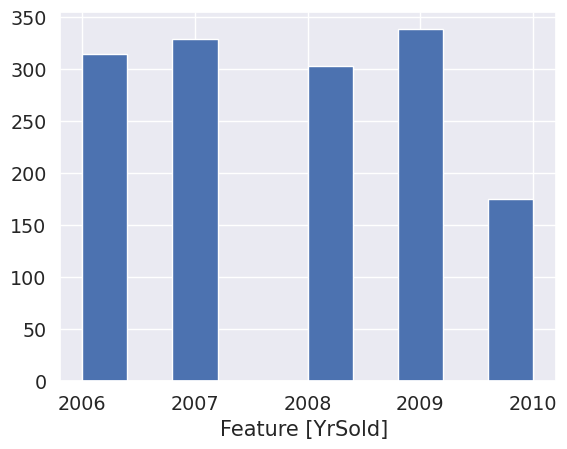

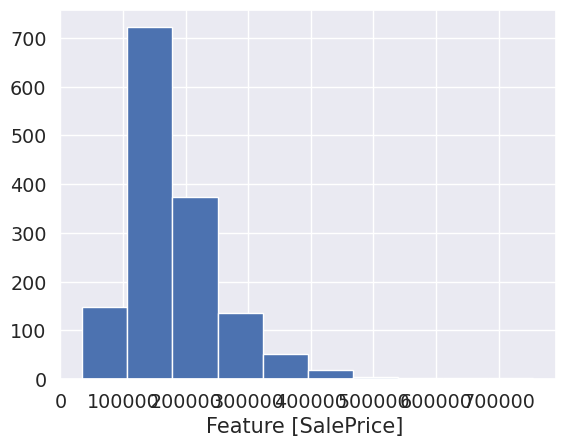

In [ ]:
numeric_df = df_train.select_dtypes(exclude=['object'])
for col in numeric_df.columns:
  fig, ax = plt.subplots()
  ax.hist(df_train[col])
  ax.set_xlabel('Feature [' + col + '] ')

In [ ]:
#LotArea BsmtFinSF1 BsmtFinSF2 TotalBsmtSF 1stFlrSF 2ndFlrSF LowQualFinSF WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch PoolArea MiscVal
all_data['LotArea'] = np.log(all_data['LotArea'] + 1)
all_data['BsmtFinSF1'] = np.log(all_data['BsmtFinSF1'] + 1)
all_data['BsmtFinSF2'] = np.log(all_data['BsmtFinSF2'] + 1)
all_data['TotalBsmtSF'] = np.log(all_data['TotalBsmtSF'] + 1)
all_data['2ndFlrSF'] = np.log(all_data['2ndFlrSF'] + 1)
all_data['LowQualFinSF'] = np.log(all_data['LowQualFinSF'] + 1)
all_data['WoodDeckSF'] = np.log(all_data['WoodDeckSF'] + 1)
all_data['OpenPorchSF'] = np.log(all_data['OpenPorchSF'] + 1)
all_data['EnclosedPorch'] = np.log(all_data['EnclosedPorch'] + 1)
all_data['3SsnPorch'] = np.log(all_data['3SsnPorch'] + 1)
all_data['PoolArea'] = np.log(all_data['PoolArea'] + 1)
all_data['MiscVal'] = np.log(all_data['MiscVal'] + 1)

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


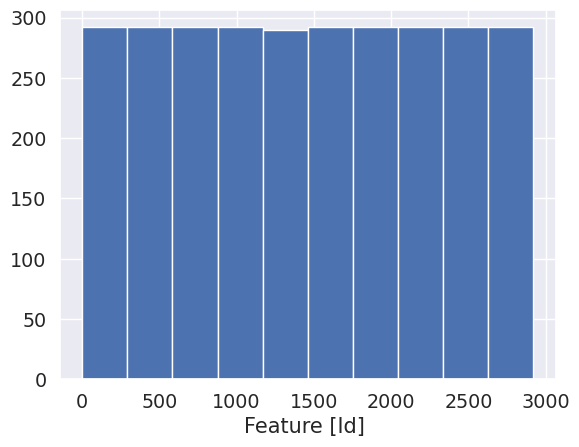

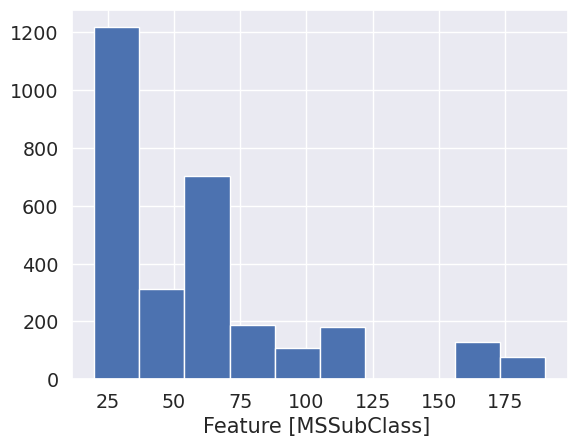

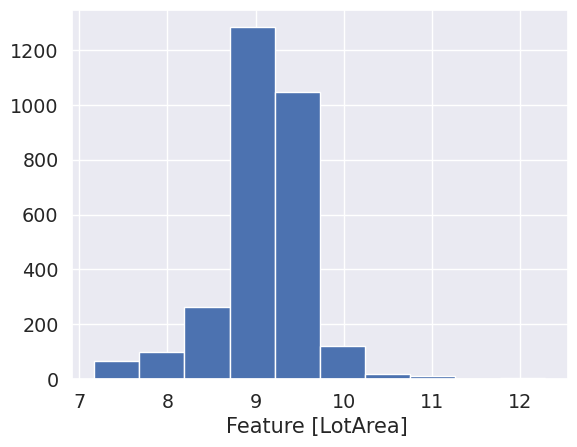

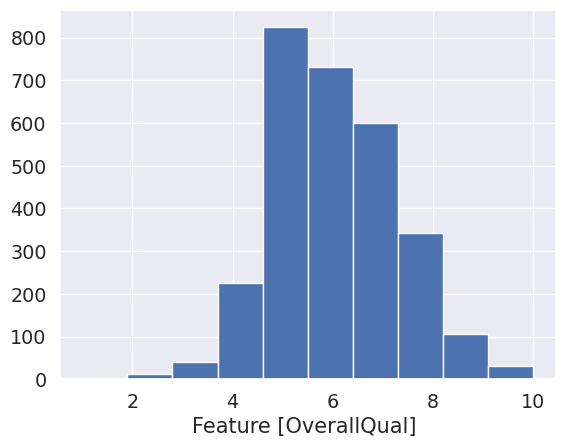

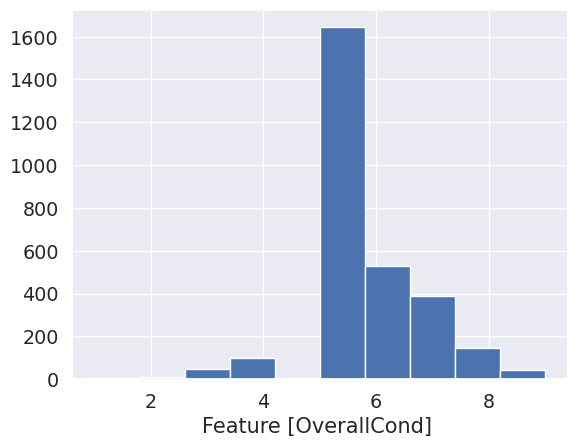

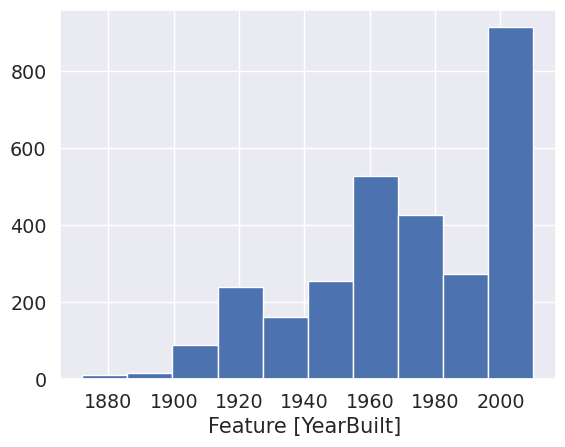

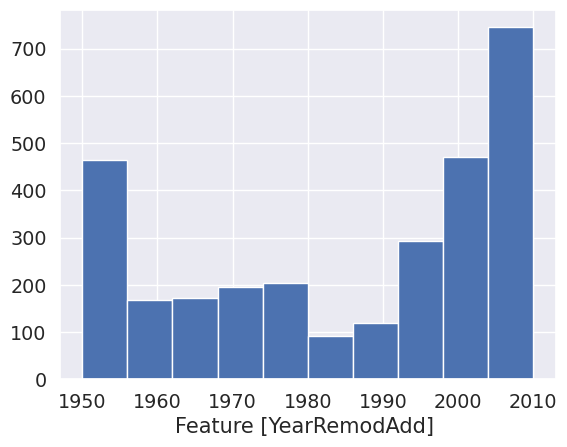

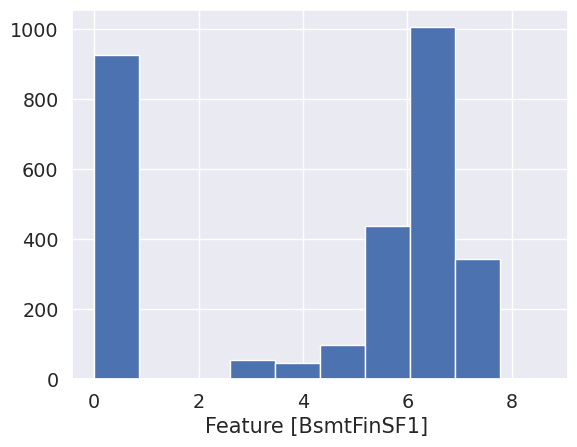

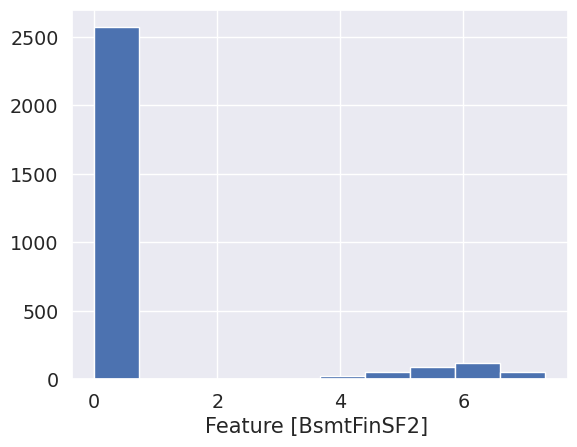

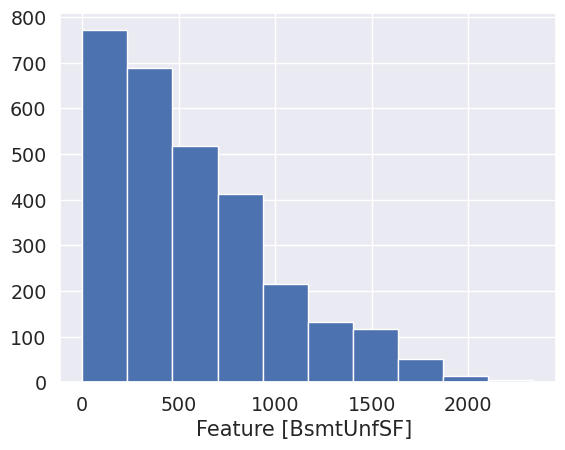

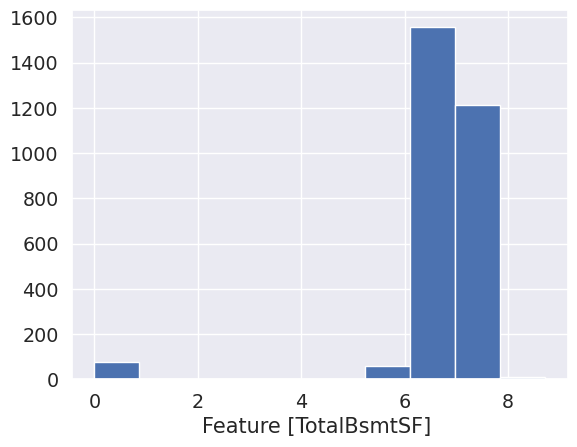

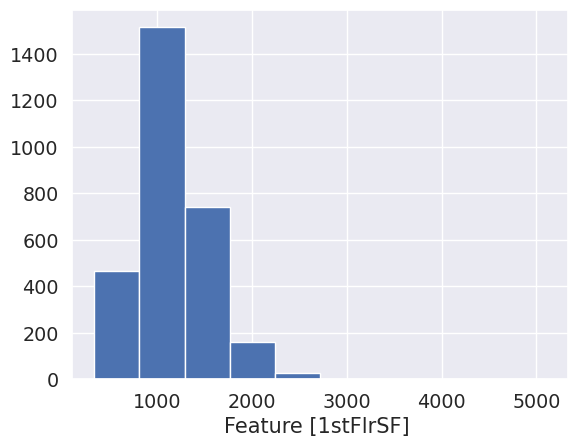

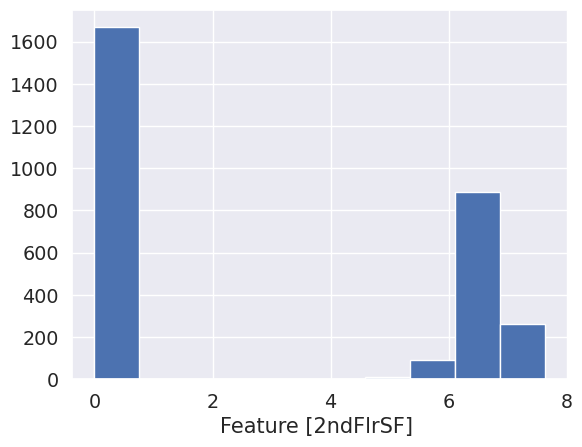

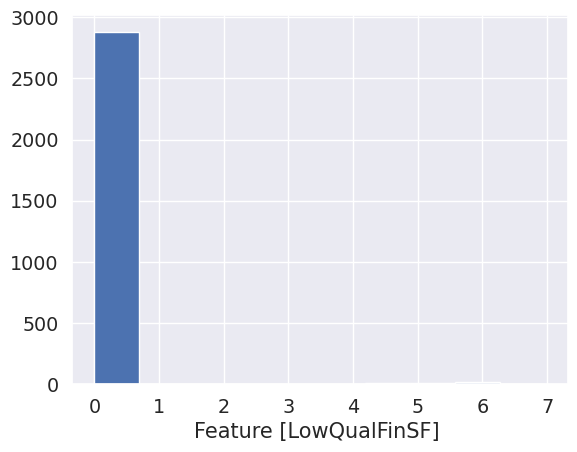

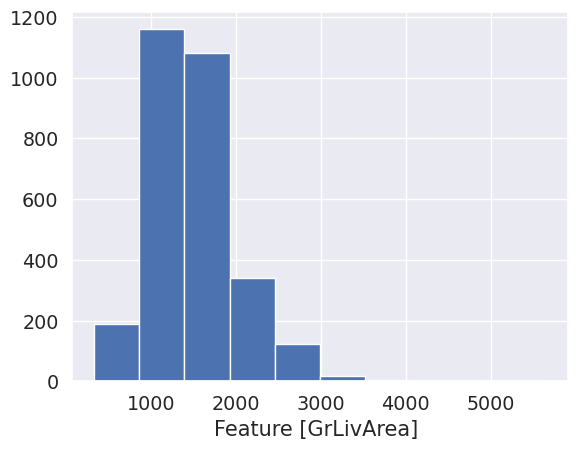

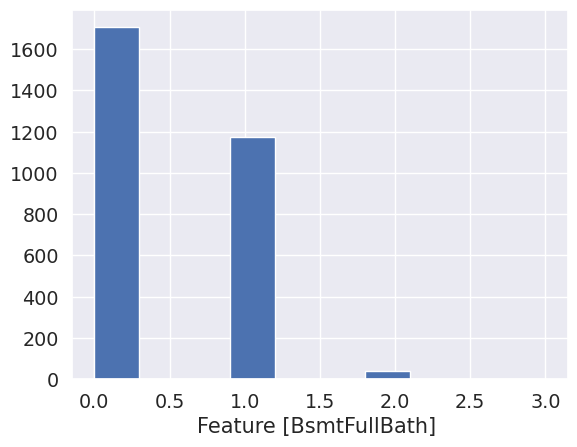

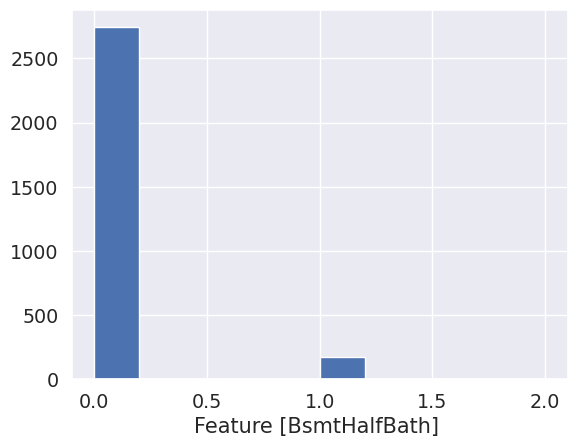

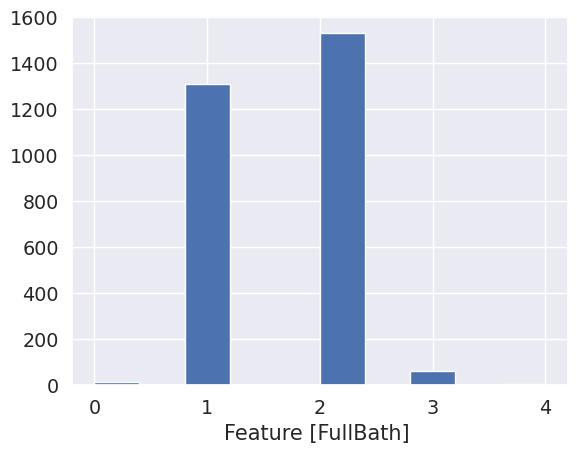

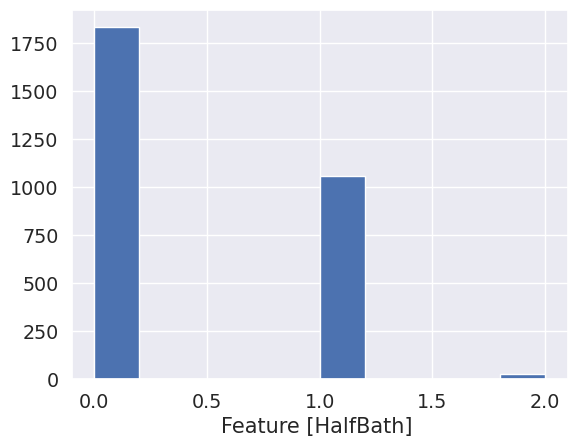

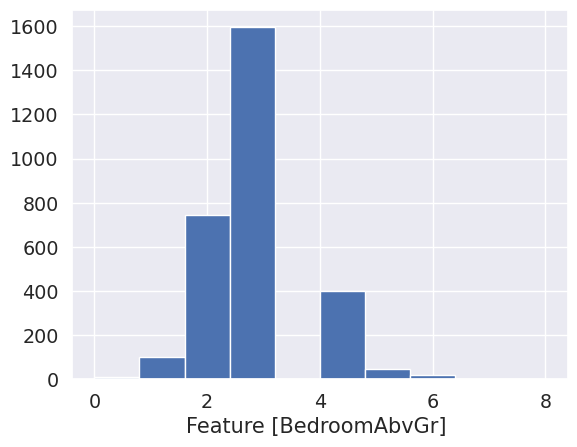

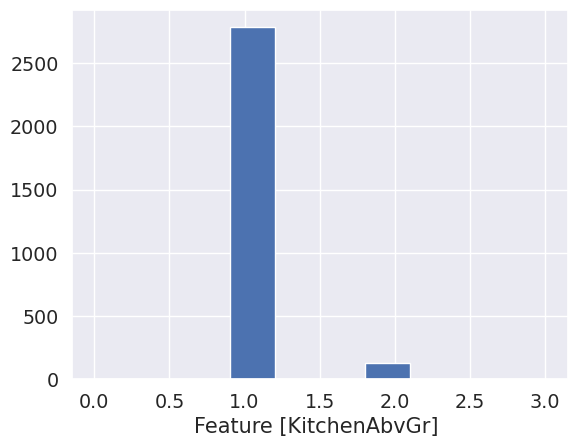

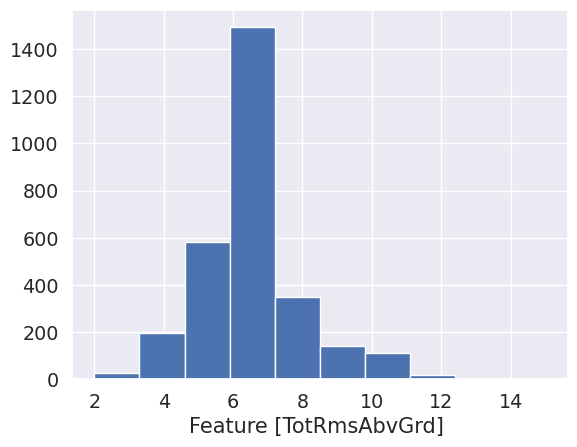

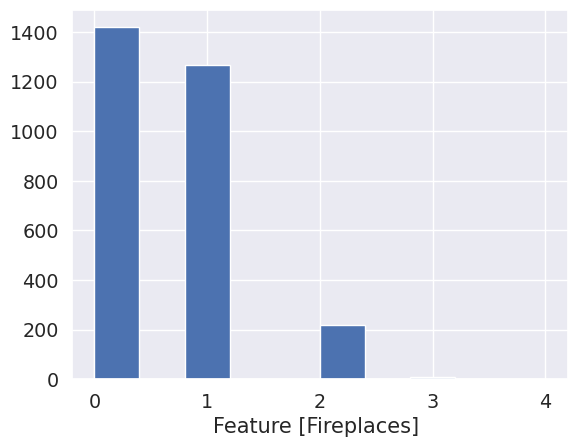

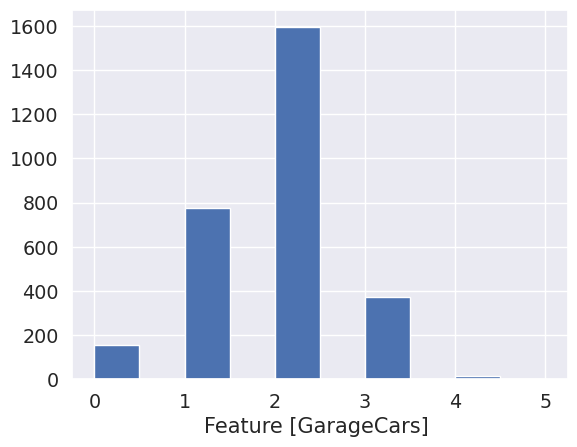

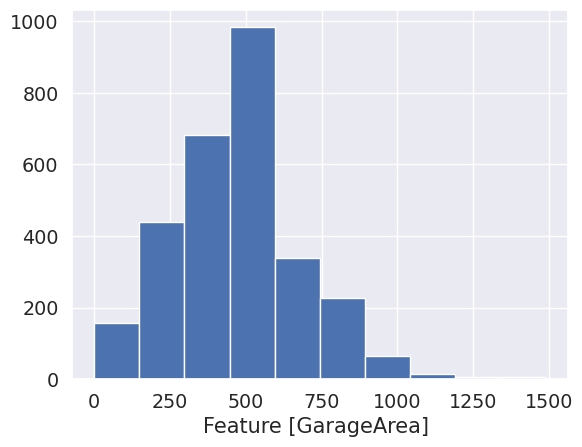

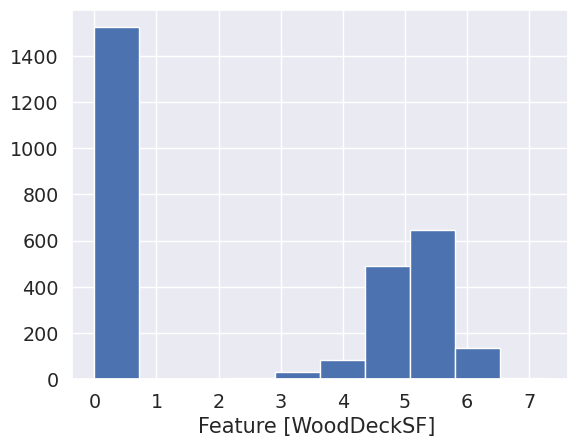

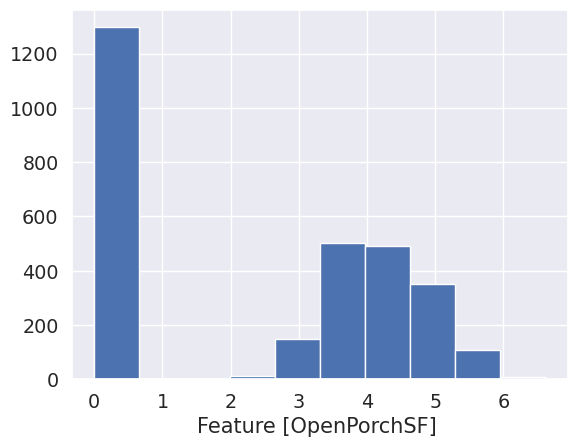

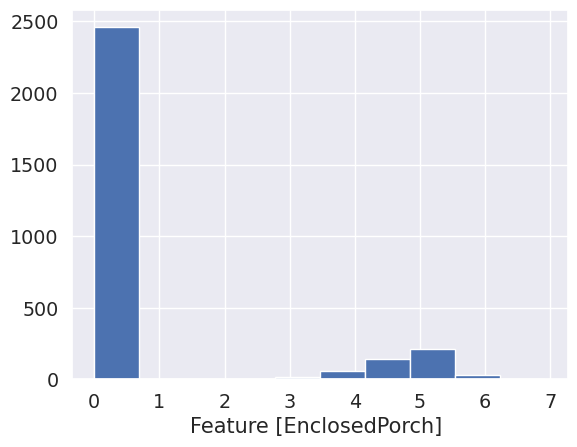

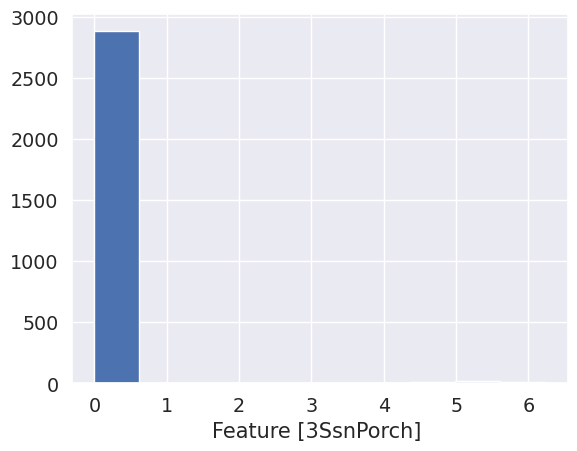

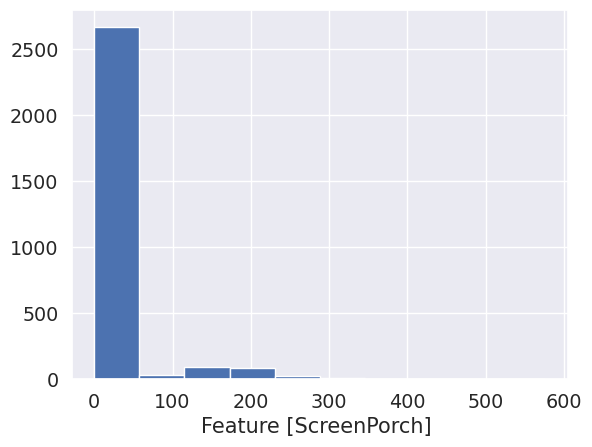

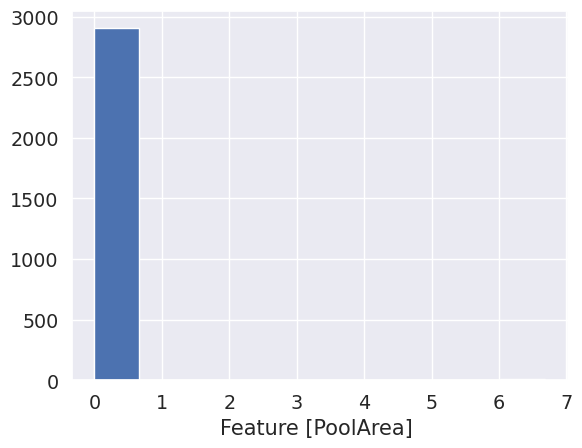

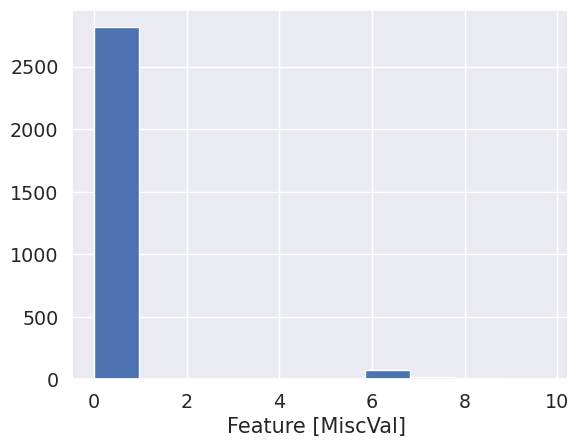

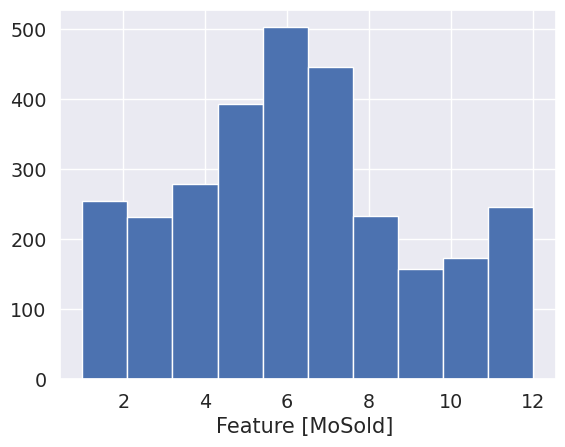

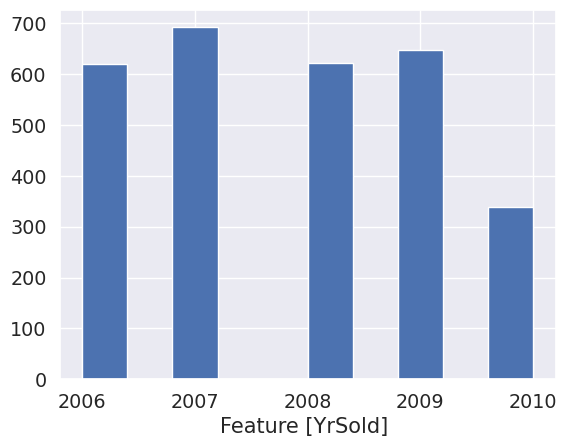

In [ ]:
for col in numeric_df.columns:
  if col != 'SalePrice':
    fig, ax = plt.subplots()
    ax.hist(all_data[col])
    ax.set_xlabel('Feature [' + col + '] ')

In [ ]:
#One-hot encoding
excluded_columns = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'Functional']
cat_features = [col for col in object_df.columns if col not in excluded_columns]

all_data = pd.get_dummies(all_data, columns = cat_features)

In [ ]:
all_data

,Id,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,9.042040,Reg,Gtl,7,5,2003,2003,Gd,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9.169623,Reg,Gtl,6,8,1976,1976,TA,...,0,0,0,1,0,0,0,0,1,0
2,3,60,9.328212,IR1,Gtl,7,5,2001,2002,Gd,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9.164401,IR1,Gtl,7,5,1915,1970,TA,...,0,0,0,1,1,0,0,0,0,0
4,5,60,9.565284,IR1,Gtl,8,5,2000,2000,Gd,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2915,160,7.568896,Reg,Gtl,4,7,1970,1970,TA,...,0,0,0,1,0,0,0,0,1,0
2914,2916,160,7.546974,Reg,Gtl,4,5,1970,1970,TA,...,0,0,0,1,1,0,0,0,0,0
2915,2917,20,9.903538,Reg,Gtl,5,7,1960,1996,TA,...,0,0,0,1,1,0,0,0,0,0
2916,2918,85,9.253591,Reg,Gtl,5,5,1992,1992,TA,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
for i in all_data.columns:
  print(i)

Id
MSSubClass
LotArea
LotShape
LandSlope
OverallQual
OverallCond
YearBuilt
YearRemodAdd
ExterQual
ExterCond
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
HeatingQC
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhoo

In [ ]:
#Order
#Lotshape Landslope ExterQual ExterCond HeatingQC KitchenQual Functional
# Define mapping for ordinal encoding
ordinal_mapping = {
    'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
    'LandSlope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
}

# Apply ordinal encoding
all_data.replace(ordinal_mapping, inplace=True)

all_data[excluded_columns]

,LotShape,LandSlope,ExterQual,ExterCond,HeatingQC,KitchenQual,Functional
0,4,3,4,3,5,4,8
1,4,3,3,3,5,3,8
2,3,3,4,3,5,4,8
3,3,3,3,3,4,4,8
4,3,3,4,3,5,4,8
...,...,...,...,...,...,...,...
2913,4,3,3,3,4,3,8
2914,4,3,3,3,3,3,8
2915,4,3,3,3,5,3,8
2916,4,3,3,3,3,3,8


In [ ]:
all_data.isnull().sum().max()

0

In [ ]:
df_train = all_data[:ntrain]
df_test = all_data[ntrain:]
df_train['SalePrice'] = y


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_train

,Id,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,9.042040,4,3,7,5,2003,2003,4,...,0,0,1,0,0,0,0,1,0,208500
1,2,20,9.169623,4,3,6,8,1976,1976,3,...,0,0,1,0,0,0,0,1,0,181500
2,3,60,9.328212,3,3,7,5,2001,2002,4,...,0,0,1,0,0,0,0,1,0,223500
3,4,70,9.164401,3,3,7,5,1915,1970,3,...,0,0,1,1,0,0,0,0,0,140000
4,5,60,9.565284,3,3,8,5,2000,2000,4,...,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,8.976894,4,3,6,5,1999,2000,3,...,0,0,1,0,0,0,0,1,0,175000
1455,1457,20,9.486152,4,3,6,6,1978,1988,3,...,0,0,1,0,0,0,0,1,0,210000
1456,1458,70,9.109746,4,3,7,9,1941,2006,5,...,0,0,1,0,0,0,0,1,0,266500
1457,1459,20,9.181735,4,3,5,6,1950,1996,3,...,0,0,1,0,0,0,0,1,0,142125


In [ ]:
df_test

,Id,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1459,1461,20,9.360741,4,3,5,6,1961,1961,3,...,0,0,0,1,0,0,0,0,1,0
1460,1462,20,9.565775,3,3,6,6,1958,1958,3,...,0,0,0,1,0,0,0,0,1,0
1461,1463,60,9.534668,3,3,5,5,1997,1998,3,...,0,0,0,1,0,0,0,0,1,0
1462,1464,60,9.208238,3,3,6,6,1998,1998,3,...,0,0,0,1,0,0,0,0,1,0
1463,1465,120,8.518392,3,3,8,5,1992,1992,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2915,160,7.568896,4,3,4,7,1970,1970,3,...,0,0,0,1,0,0,0,0,1,0
2914,2916,160,7.546974,4,3,4,5,1970,1970,3,...,0,0,0,1,1,0,0,0,0,0
2915,2917,20,9.903538,4,3,5,7,1960,1996,3,...,0,0,0,1,1,0,0,0,0,0
2916,2918,85,9.253591,4,3,5,5,1992,1992,3,...,0,0,0,1,0,0,0,0,1,0


#Prepare for Model

In [ ]:
df_train.reset_index(drop=True, inplace=True)
x_train, y_train = df_train.iloc[:,:-1], df_train.iloc[:,-1]

In [ ]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    175000
1455    210000
1456    266500
1457    142125
1458    147500
Name: SalePrice, Length: 1459, dtype: int64

In [ ]:
x_train

,Id,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,9.042040,4,3,7,5,2003,2003,4,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9.169623,4,3,6,8,1976,1976,3,...,0,0,0,1,0,0,0,0,1,0
2,3,60,9.328212,3,3,7,5,2001,2002,4,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9.164401,3,3,7,5,1915,1970,3,...,0,0,0,1,1,0,0,0,0,0
4,5,60,9.565284,3,3,8,5,2000,2000,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,8.976894,4,3,6,5,1999,2000,3,...,0,0,0,1,0,0,0,0,1,0
1455,1457,20,9.486152,4,3,6,6,1978,1988,3,...,0,0,0,1,0,0,0,0,1,0
1456,1458,70,9.109746,4,3,7,9,1941,2006,5,...,0,0,0,1,0,0,0,0,1,0
1457,1459,20,9.181735,4,3,5,6,1950,1996,3,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=RAND_STATE).get_n_splits(df_train.values)
    rmse= np.sqrt(-cross_val_score(model, df_train.values, y_train.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
def smote(x, y):
  oversampler = over_sampling.SMOTE()
  x_balanced, y_balanced = oversampler.fit_resample(x, y)
  return x_balanced, y_balanced

In [ ]:
def run_model(model, resampler=None, preprocessors=[]):
  #Return values
  f1_train_list, f1_val_list = [], []
  y_train_val_list, y_train_val_pred_list = [], []

  #Stratified X_validation
  kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=RAND_STATE)
  for train_index, val_index in kf.split(x_train):
    #Split the data
    x_train_train, x_train_val = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_train, y_train_val = y_train.iloc[train_index], y_train.iloc[val_index]

    #Feature Engineering
    for preprocessor in preprocessors:
      preprocessor(x_train_train)
      preprocessor(x_train_val)

    #Balance the data
    if resampler is not None:
      x_train_train, y_train_train = resampler(x_train_train, y_train_train)

    #Train the model
    model.fit(x_train_train,y_train_train)

    #Evaluate the training set
    y_train_train_pred = model.predict(x_train_train)
    f1 = metrics.f1_score(y_train_train, y_train_train_pred)
    f1_train_list.append(f1)

    #Evaluate the validation set
    y_train_val_pred = model.predict(x_train_val)
    f1 = metrics.f1_score(y_train_val, y_train_val_pred)
    f1_val_list.append(f1)

    y_train_val_list += list(y_train_val)
    y_train_val_pred_list += list(model.predict_proba(x_train_val)[:, 1])

  return f1_train_list, f1_val_list, y_train_val_list, y_train_val_pred_list

In [ ]:
f1_train, f1_val = {}, {}
y_train_val, y_train_val_pred = {}, {}

#Linear Regression

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from collections import OrderedDict
err_train = OrderedDict() # Dict of errors measured in training set
err_val = OrderedDict() # Dict of errors measured in validation set
poly = OrderedDict() # Dict of transformers
models = OrderedDict() # Dict of models

In [ ]:
for col in ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']:
  for deg in range(1, 6):
    model_name = 'poly' + col + str(deg)
    poly[model_name] = PolynomialFeatures(degree=deg, include_bias=False)

    # CV
    err_train[model_name] = []
    err_val[model_name] = []

    kf = KFold(n_splits=5, shuffle=True, random_state=RAND_STATE)

    # วนไป 5-fold
    for train_index, val_index in kf.split(x_train):
      # แปลง index เป็นค่าที่เก็บไว้ในแถวนั้น
      x_train_train, x_train_val = x_train[col][train_index], x_train[col][val_index]
      y_train_train, y_train_val = y_train[train_index], y_train[val_index]

      # Preprocess the data เอา x ของ train กับ validation ไปยกกำลัง
      x_train_poly = poly[model_name].fit_transform(np.array(x_train_train).reshape(-1,1))
      x_val_poly = poly[model_name].transform(np.array(x_train_val).reshape(-1,1))

      # Initiate a linear model (Ridge Regression)
      model = linear_model.Ridge(alpha=0.001)
      # Train the model โดยใช้ x ที่ยกกำลังแล้ว
      model.fit(x_train_poly, y_train_train)

      models[model_name] = model

      #Evaluate on the training set หาความต่างค่า y จริงกับ y ที่ทาย ของ train set
      y_train_pred = model.predict(x_train_poly)
      mse = mean_squared_error(y_train_train, y_train_pred)
      err_train[model_name].append(mse)

      #Evaluate on the validation set หาความต่างค่า y จริงกับ y ที่ทาย ของ val set
      y_val_pred = model.predict(x_val_poly)
      mse = mean_squared_error(y_train_val, y_val_pred)
      err_val[model_name].append(mse)

Ill-conditioned matrix (rcond=7.48936e-23): result may not be accurate.
Ill-conditioned matrix (rcond=7.26726e-23): result may not be accurate.
Ill-conditioned matrix (rcond=7.87242e-23): result may not be accurate.
Ill-conditioned matrix (rcond=7.85319e-23): result may not be accurate.
Ill-conditioned matrix (rcond=7.81294e-23): result may not be accurate.
Ill-conditioned matrix (rcond=1.00013e-30): result may not be accurate.
Ill-conditioned matrix (rcond=1.04958e-30): result may not be accurate.
Ill-conditioned matrix (rcond=1.03757e-30): result may not be accurate.
Ill-conditioned matrix (rcond=1.04022e-30): result may not be accurate.
Ill-conditioned matrix (rcond=1.01906e-30): result may not be accurate.
Ill-conditioned matrix (rcond=1.65744e-37): result may not be accurate.
Ill-conditioned matrix (rcond=1.73802e-37): result may not be accurate.
Ill-conditioned matrix (rcond=1.71903e-37): result may not be accurate.
Ill-conditioned matrix (rcond=1.72252e-37): result may not be ac

In [ ]:
err_train.items()

odict_items([('polyOverallQual1', [2538570466.3018517, 2050413652.1178937, 2339538017.9399967, 2426189154.1116643, 2440792202.109194]), ('polyOverallQual2', [2166057649.3711576, 1826609264.706962, 1961668552.2854683, 2061650410.1288803, 2101224675.3545256]), ('polyOverallQual3', [2147950785.0164995, 1822202649.9401112, 1926557403.5695782, 2038968792.690294, 2079863144.1910455]), ('polyOverallQual4', [2141186975.3632452, 1805129220.8917463, 1926215053.5588155, 2029190618.382684, 2075098319.3075557]), ('polyOverallQual5', [2132769413.521389, 1786737611.4218843, 1923454320.4212134, 2022968898.2505984, 2063248298.6724732]), ('polyYearBuilt1', [4818330021.244027, 3989372005.555572, 4749879897.213296, 4602988122.057904, 4738269054.752339]), ('polyYearBuilt2', [4268405517.581866, 3551702355.4053245, 4231550165.689861, 4206161264.932013, 4256515914.9956374]), ('polyYearBuilt3', [4259515564.268301, 3547326783.096404, 4225909711.819653, 4185627409.786403, 4247158897.333533]), ('polyYearBuilt4', 

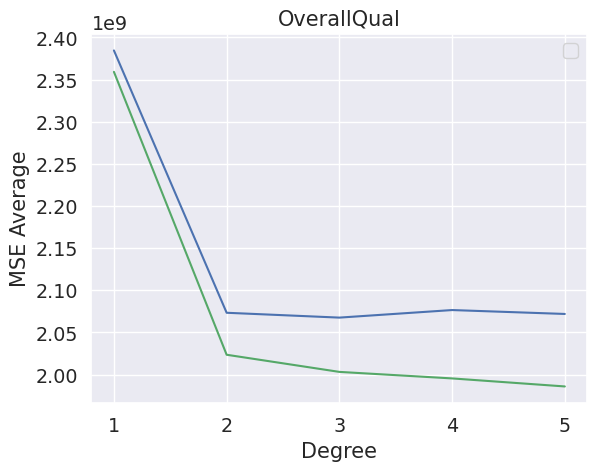

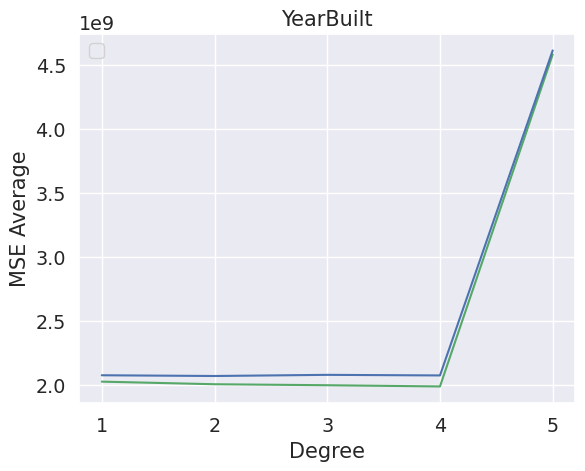

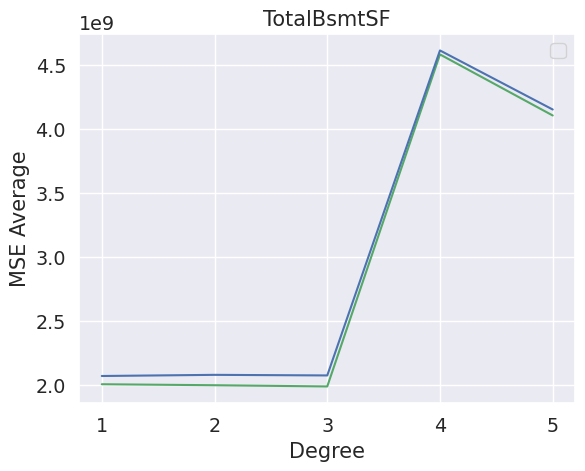

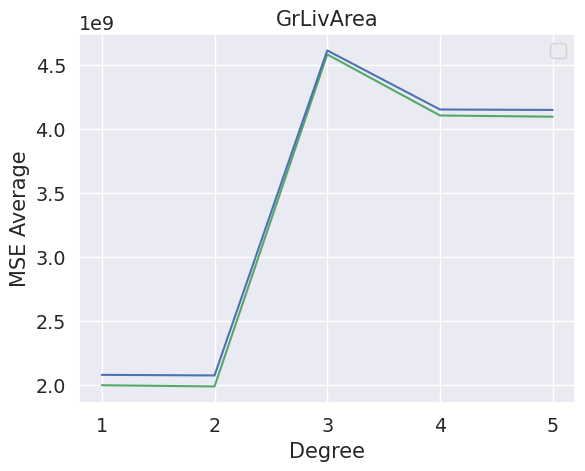

In [ ]:
mse_means_train = []
for model_name, errors in err_train.items():
  mse_means_train += [np.mean(errors)]

mse_means_val = []
for model_name, errors in err_val.items():
  mse_means_val += [np.mean(errors)]

for i in range(4):
  fig, ax = plt.subplots()
  ax.set_title(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea'][i])
  ax.set_xlabel('Degree')
  ax.set_ylabel('MSE Average')
  ax.plot(range(1, 6), mse_means_train[i:i+5], c='g')
  ax.plot(range(1, 6), mse_means_val[i:i+5], c='b')
  ax.legend()

In [ ]:
err_train = OrderedDict() # Dict of errors measured in training set
err_val = OrderedDict() # Dict of errors measured in validation set
poly = OrderedDict() # Dict of transformers
models = OrderedDict() # Dict of models

from sklearn.compose import ColumnTransformer
columns_to_transform = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']
for deg in range(1, 3):
  poly_transformer = PolynomialFeatures(degree=deg, include_bias=False)

  # Create a ColumnTransformer to apply the polynomial transformation to specified columns
  ct = ColumnTransformer(
      [('poly', poly_transformer, columns_to_transform)],
      remainder='passthrough'  # Keep all other columns unchanged
  )

  # Fit and transform the data using the ColumnTransformer
  x_poly = ct.fit_transform(x_train)

  err_train['Ridge' + str(deg)] = []
  err_val['Ridge' + str(deg)] = []

  kf = KFold(n_splits=5, shuffle=True, random_state=RAND_STATE)

  # วนไป 5-fold
  for train_index, val_index in kf.split(x_poly):
    # แปลง index เป็นค่าที่เก็บไว้ในแถวนั้น
    x_train_train, x_train_val = x_poly[train_index], x_poly[val_index]
    y_train_train, y_train_val = y_train.loc[train_index], y_train.loc[val_index]

    # Initiate a linear model (Ridge Regression)
    model = linear_model.Ridge(alpha=0.5)
    # Train the model โดยใช้ x ที่ยกกำลังแล้ว
    model.fit(x_train_train, y_train_train)

    #Evaluate on the training set หาความต่างค่า y จริงกับ y ที่ทาย ของ train set
    y_train_pred = model.predict(x_train_train)
    mse = mean_squared_error(y_train_train, y_train_pred)
    err_train['Ridge'+ str(deg)].append(mse)

    #Evaluate on the validation set หาความต่างค่า y จริงกับ y ที่ทาย ของ val set
    y_val_pred = model.predict(x_train_val)
    mse = mean_squared_error(y_train_val, y_val_pred)
    err_val['Ridge'+ str(deg)].append(mse)

Ill-conditioned matrix (rcond=4.55045e-17): result may not be accurate.
Ill-conditioned matrix (rcond=4.96069e-17): result may not be accurate.
Ill-conditioned matrix (rcond=5.28127e-17): result may not be accurate.
Ill-conditioned matrix (rcond=4.78925e-17): result may not be accurate.
Ill-conditioned matrix (rcond=5.13999e-17): result may not be accurate.


###Linear Regression Evaluation

Text(0, 0.5, 'Mse')

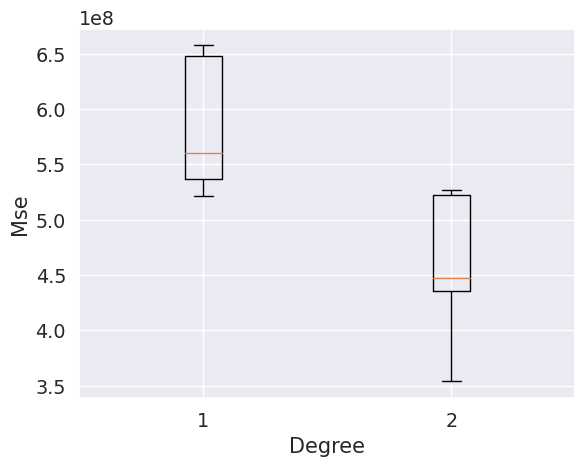

In [ ]:
# Plot training errors
bp_train = plt.boxplot(err_train.values())
plt.xlabel('Degree')
plt.ylabel('Mse')

Text(0, 0.5, 'Mse')

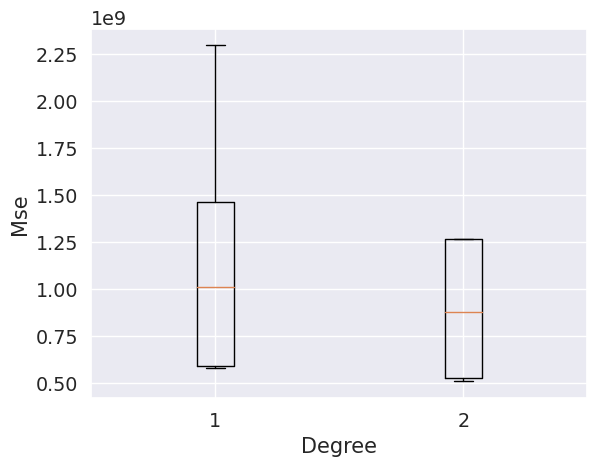

In [ ]:
# Plot training errors
bp_val = plt.boxplot(err_val.values(), showfliers=False)
plt.xlabel('Degree')
plt.ylabel('Mse')

In [ ]:
err_train = OrderedDict() # Dict of errors measured in training set
err_val = OrderedDict() # Dict of errors measured in validation set
poly = OrderedDict() # Dict of transformers
models = OrderedDict() # Dict of models

from sklearn.compose import ColumnTransformer
columns_to_transform = ['OverallQual', 'YearBuilt', 'TotalBsmtSF']
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Create a ColumnTransformer to apply the polynomial transformation to specified columns
ct = ColumnTransformer(
    [('poly', poly_transformer, columns_to_transform)],
    remainder='passthrough'  # Keep all other columns unchanged
)

# Fit and transform the data using the ColumnTransformer
x_poly = ct.fit_transform(x_train)

err_train['Ridge'] = []
err_val['Ridge'] = []

kf = KFold(n_splits=5, shuffle=True, random_state=RAND_STATE)

# วนไป 5-fold
for train_index, val_index in kf.split(x_poly):
  # แปลง index เป็นค่าที่เก็บไว้ในแถวนั้น
  x_train_train, x_train_val = x_poly[train_index], x_poly[val_index]
  y_train_train, y_train_val = y_train.loc[train_index], y_train.loc[val_index]

  # Initiate a linear model (Ridge Regression)
  model = linear_model.Ridge(alpha=0.5)
  # Train the model โดยใช้ x ที่ยกกำลังแล้ว
  model.fit(x_train_train, y_train_train)

  #Evaluate on the training set หาความต่างค่า y จริงกับ y ที่ทาย ของ train set
  y_train_pred = model.predict(x_train_train)
  mse = mean_squared_error(y_train_train, y_train_pred)
  err_train['Ridge'].append(mse)

  #Evaluate on the validation set หาความต่างค่า y จริงกับ y ที่ทาย ของ val set
  y_val_pred = model.predict(x_train_val)
  mse = mean_squared_error(y_train_val, y_val_pred)
  err_val['Ridge'].append(mse)

In [ ]:
model.score(x_poly, y_train)

0.9150407700354773

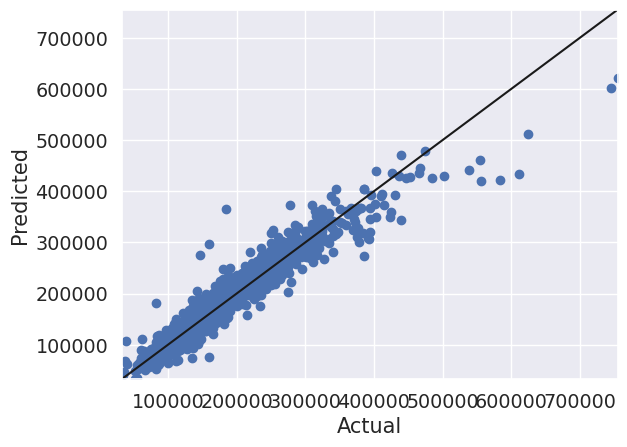

In [ ]:
y_train_pred = model.predict(x_poly)
min_ = min(y_train.min(), y_train_pred.min())
max_ = max(y_train.max(), y_train_pred.max())
plt.scatter(y_train, y_train_pred)
plt.xlim([min_, max_])
plt.ylim([min_, max_])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min_, max_], [min_, max_], c='k')

##Predict Test

In [ ]:
x_test_poly = ct.fit_transform(df_test)

In [ ]:
y_test_pred = model.predict(x_test_poly)

In [ ]:
result_df = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_test_pred})
result_df.to_csv('Ridge_results.csv', index=False)

#Decision Tree

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state= RAND_STATE)
regressor.fit(x_poly, y_train)
print(np.mean(cross_val_score(regressor, x_poly, y_train, cv=10)))

0.7526313923410217


##Decision Tree Evaluation

In [ ]:
path = regressor.cost_complexity_pruning_path(x_poly, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

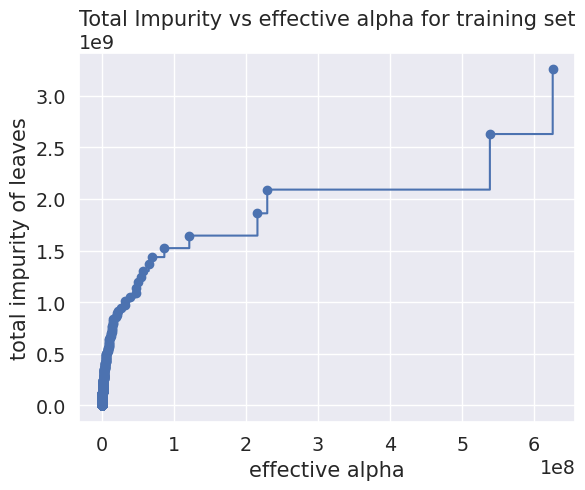

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=RAND_STATE, ccp_alpha=ccp_alpha)
    clf.fit(x_poly, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 3055743115.348425


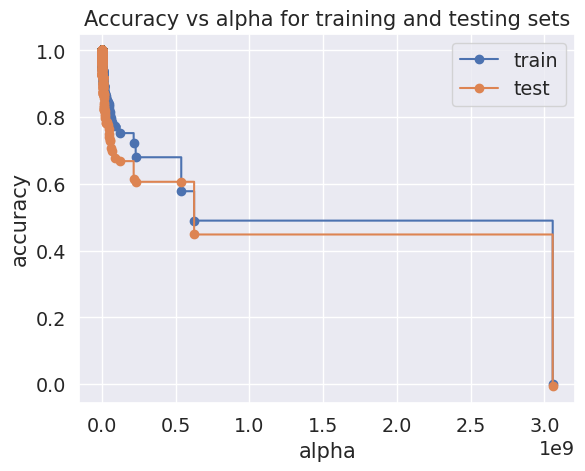

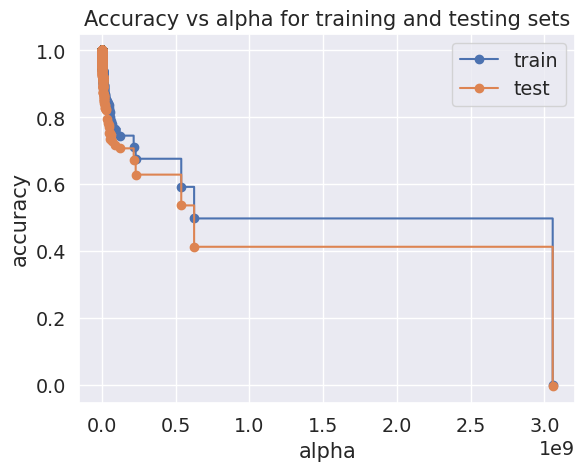

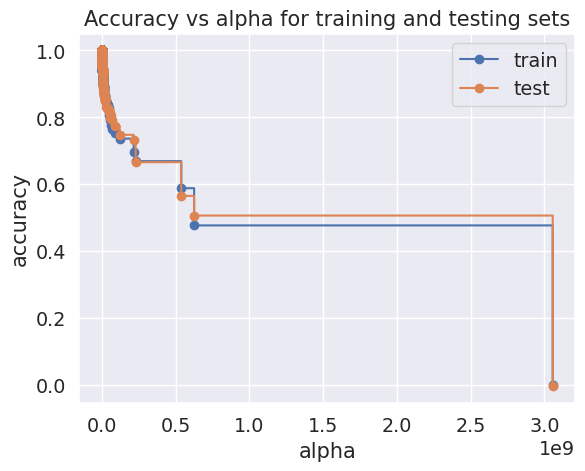

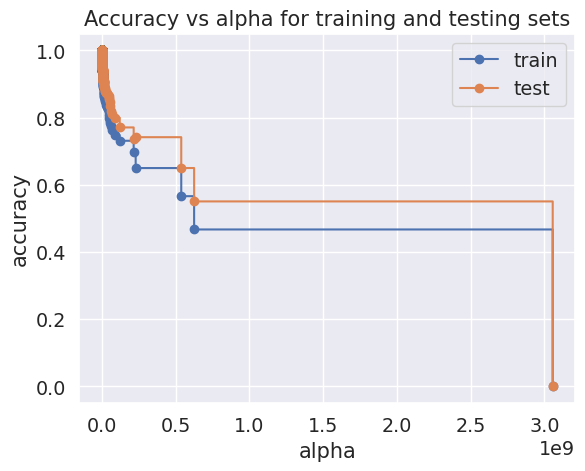

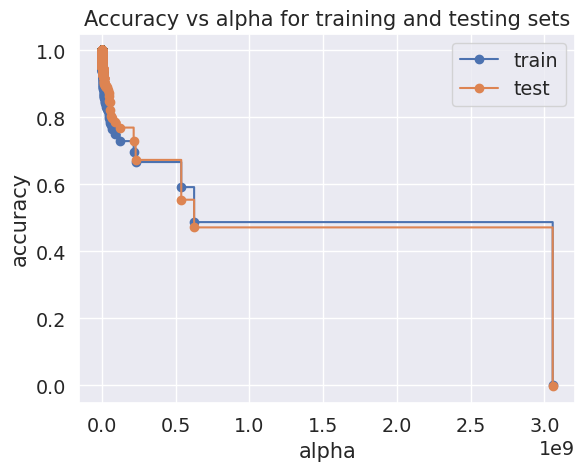

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=RAND_STATE)

# วนไป 5-fold
for train_index, val_index in kf.split(x_poly):
  # แปลง index เป็นค่าที่เก็บไว้ในแถวนั้น
  x_train_train, x_train_val = x_poly[train_index], x_poly[val_index]
  y_train_train, y_train_val = y_train.loc[train_index], y_train.loc[val_index]

  train_scores = [clf.score(x_train_train, y_train_train) for clf in clfs]
  test_scores = [clf.score(x_train_val, y_train_val) for clf in clfs]

  fig, ax = plt.subplots()
  ax.set_xlabel("alpha")
  ax.set_ylabel("accuracy")
  ax.set_title("Accuracy vs alpha for training and testing sets")
  ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
  ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
  ax.legend()
plt.show()

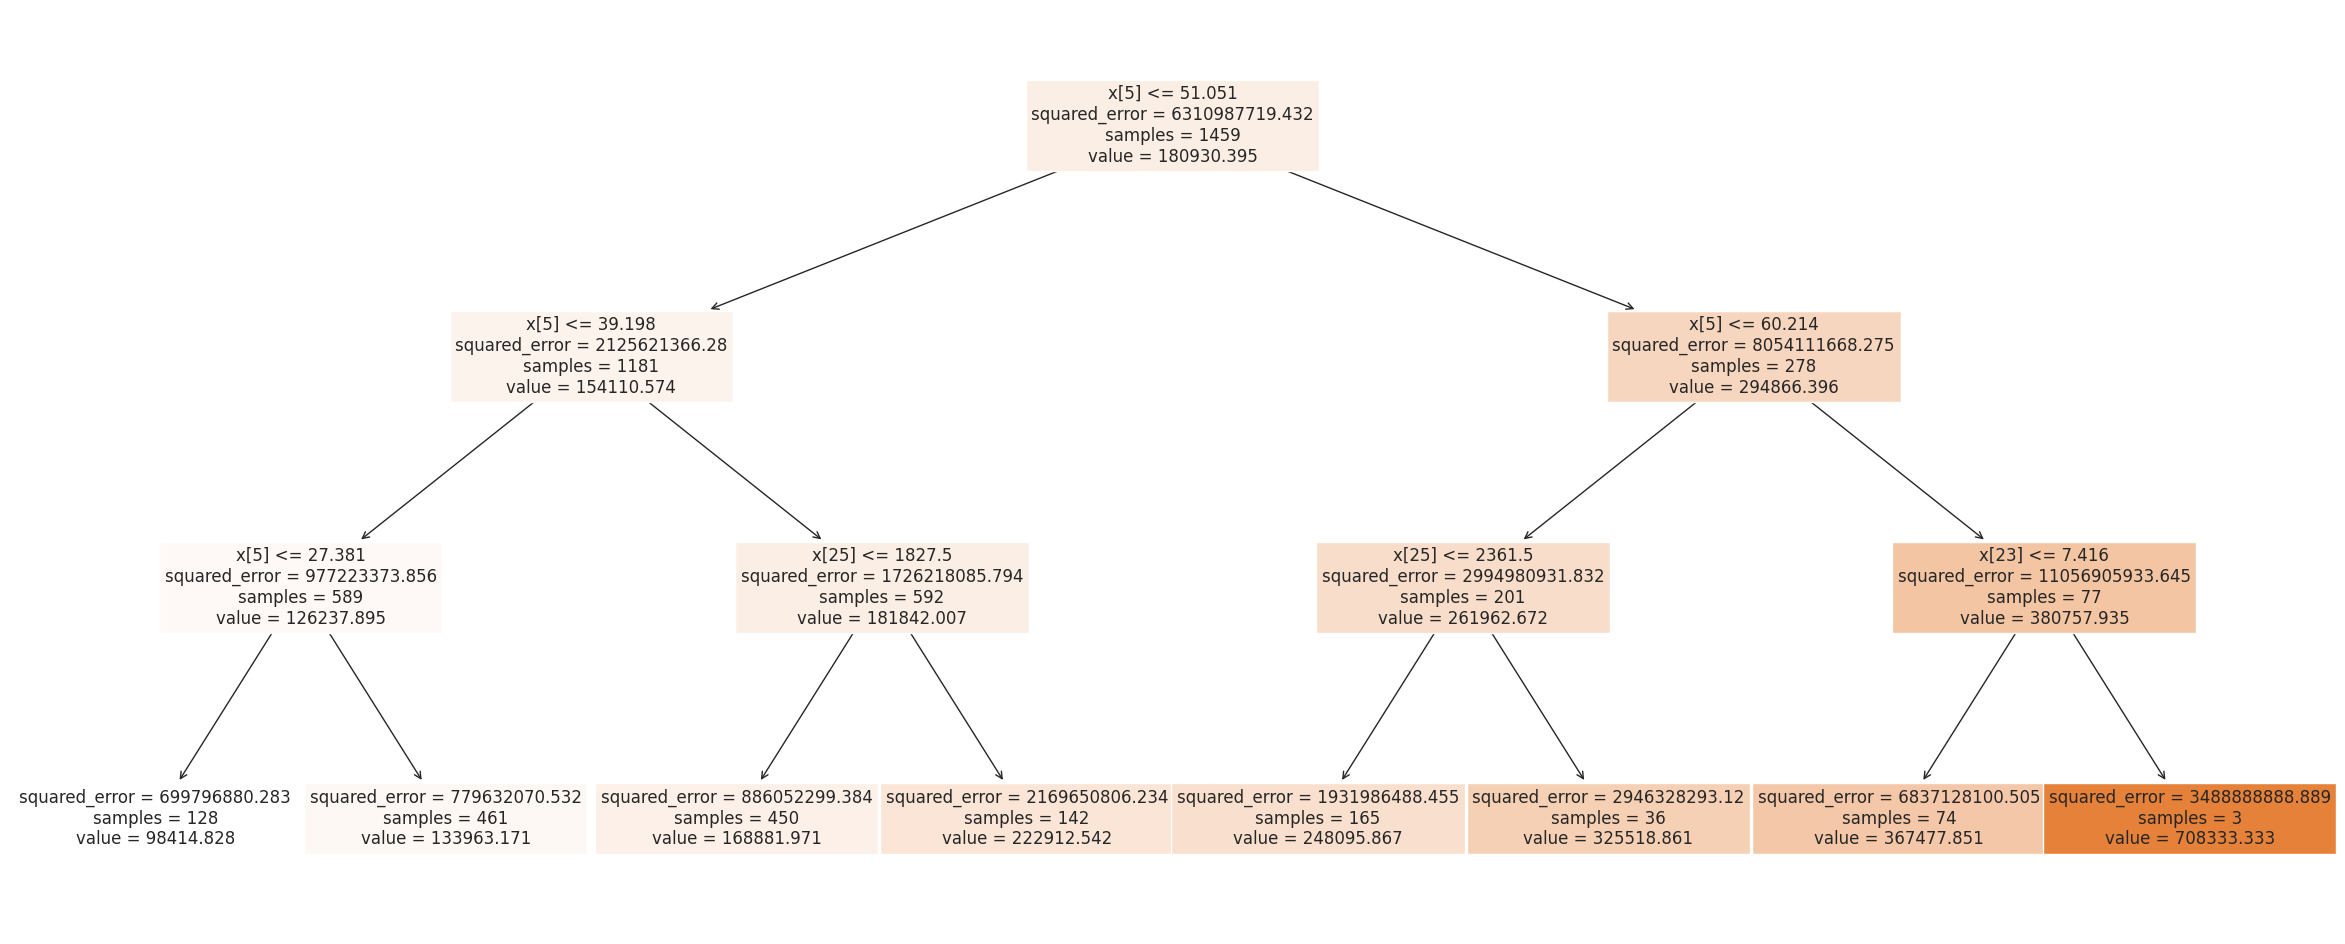

In [ ]:
from sklearn import tree

clf = DecisionTreeRegressor(max_depth=3)
clf.fit(x_poly, y_train)
plt.figure(figsize=(30,12))
tree.plot_tree(clf, filled=True, feature_names=None, class_names=None, fontsize=12)
plt.show()

##Decision Tree Predict

In [ ]:
y_test_pred = regressor.predict(x_test_poly)
result_df = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_test_pred})
result_df.to_csv('DT_results.csv', index=False)

#Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=150, alpha=8e-05, random_state= RAND_STATE, max_iter=1000).fit(x_poly, y_train)
nn.score(x_poly, y_train)

0.7694013036708008

###Neural Network Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            'alpha':[0.00005, 0.00008, 0.0001],
            'hidden_layer_sizes': [
             (100,), (150,), (180,)
             ]}
grid_search = GridSearchCV(nn, param_grid, cv=3,
                           scoring='r2', refit=True)
grid_search.fit(x_poly, y_train)


print("Best parameters set found on development set:")
print(grid_search.best_params_)

Best parameters set found on development set:
{'alpha': 8e-05, 'hidden_layer_sizes': (150,)}


##NN Prediction

In [ ]:
y_test_pred = nn.predict(x_test_poly)
result_df = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_test_pred})
result_df.to_csv('NN_results.csv', index=False)

#Random Forest

หา Leaf_nodes ที่เหมาะสมที่สุด
จากนั้นนำค่าที่ได้มาทำเป็น model ของ RandomForestRegressor ขึ้นมา

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_depth=None, random_state=42)
'''grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_poly, y_train)
print("Best Parameters:", grid_search.best_params_)'''

'grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=\'neg_mean_squared_error\', cv=5)\ngrid_search.fit(x_poly, y_train)\nprint("Best Parameters:", grid_search.best_params_)'

###Random Forest Prediction

In [ ]:
# make predictions
rf.fit(x_poly, y_train)
predictions = rf.predict(x_test_poly)

In [ ]:
rf.score(x_poly, y_train)

0.9816694712337685

In [ ]:
sub = pd.DataFrame()
sub['Id'] = df_test['Id']
sub['SalePrice'] = predictions
sub.to_csv('submission.csv',index=False)

#XGBoost

In [ ]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

##XGBoost Evaluation

In [ ]:
np.mean(cross_val_score(xgboost, x_poly, y_train, cv=5, scoring='r2'))

[17:16:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:33] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:40] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
[17:16:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.


0.8973252875403605

##XGBoost Prediction

In [ ]:
# make predictions
xgboost.fit(x_poly, y_train, verbose=False)
predictions = xgboost.predict(x_test_poly)

[10:58:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
sub = pd.DataFrame()
sub['Id'] = df_test['Id']
sub['SalePrice'] = predictions
sub.to_csv('submission.csv',index=False)

#Submit

In [ ]:
from mlxtend.regressor import StackingCVRegressor

stack_gen = StackingCVRegressor(regressors=(xgboost, nn, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [ ]:
stack_gen_model = stack_gen.fit(np.array(x_poly), np.array(y_train))
predictions = stack_gen_model.predict(x_test_poly)

[15:38:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:00] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
sub = pd.DataFrame()
sub['Id'] = df_test['Id']
sub['SalePrice'] = predictions
sub.to_csv('stacking.csv',index=False)

In [ ]:
def blended_predictions(X):
    return ((0.3 * xgboost.predict(X)) + \
            (0.05 * nn.predict(X)) + \
            (0.15 * rf.predict(X)) + \
            (0.5 * stack_gen_model.predict(np.array(X))))

In [ ]:
sub = pd.DataFrame()
sub['Id'] = df_test['Id']
sub['SalePrice'] = blended_predictions(x_test_poly)
sub.to_csv('blended.csv',index=False)